In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Переменная $nu$

In [2]:
original = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/lab1/data/data2.csv')
var_row = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/lab1/data/data4.csv')
var_row.to_csv('data/var_row.csv', index=False)
n = 104
h = 37

In [3]:
int_row = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/data/interval.csv')
int_row['cum_sum'] = np.round(np.cumsum(int_row['rf']), 3)
int_row['rf'] = np.round(int_row['rf'], 3)
int_row.to_csv('data/int_row.csv', index=False)

In [4]:
usl_mom = int_row.copy()
usl_mom = usl_mom.iloc[:, [1,3]]
usl_mom['u'] = np.arange(-3,4,1)
usl_mom['nu'] = usl_mom['rf']*usl_mom['u']
usl_mom['nu2'] = usl_mom['rf']*pow(usl_mom['u'], 2)
usl_mom['nu3'] = usl_mom['rf']*pow(usl_mom['u'], 3)
usl_mom['nu4'] = usl_mom['rf']*pow(usl_mom['u'], 4)
usl_mom['nu4+'] = usl_mom['rf']*pow(usl_mom['u']+1, 4)

In [5]:
usl_mom_f = usl_mom.append(usl_mom.sum(), ignore_index=True)
usl_mom_f.to_csv('data/usl_mom.csv', index=False)

In [6]:
moms = usl_mom_f.iloc[7, [3,4,5,6]]
moms[3]+4*moms[2]+6*moms[1]+4*moms[0]+1

26.429

In [7]:
int_mean = (int_row['avg_inter']*int_row['af']).sum()/n
int_var = (((int_row['avg_inter']-int_mean)**2)*int_row['af']).sum()/n
s = int_var*(n/(n-1))
std_s = np.sqrt(s)
std_var = np.sqrt(int_var)
int_mean
int_var
s
std_var
std_s

453.71153846153845

2865.503328402367

2893.323749066468

53.530396303430884

53.789624920299154

In [8]:
np.mean(original, axis=0)
np.std(original, axis=0)
np.var(original, axis=0)*(n/(n-1))

nu    453.201923
dtype: float64

nu    53.570116
dtype: float64

nu    2897.619025
dtype: float64

In [9]:
M1 = moms[0]*h+449.5
m2 = (moms[1] - pow(moms[0],2))*pow(h,2)
m3 = (moms[2] - 3*moms[1]*moms[0] + 2*pow(moms[0],3))*pow(h,3)
m4 = (moms[3] - 4*moms[2]*moms[0] + 6*moms[1]*pow(moms[0],2) - 3*pow(moms[0],4))*pow(h,4)
M1, m2, m3 ,m4

(453.829, 2882.170759, -22164.01915042198, 20740732.14621509)

In [10]:
As = m3/(pow(s, 3))
Ex = (m4/(pow(s, 4))) - 3

In [11]:
As, Ex

(-9.150765396131701e-07, -2.9999997040379984)

In [12]:
original.mean()
np.asarray(original.mode())
original.median()

nu    453.201923
dtype: float64

array([[482]], dtype=int64)

nu    458.5
dtype: float64

In [13]:
raw_mode = 431+h*(2/3)
raw_median = 431+(((0.5*n)-36)/25)*h
raw_mode
raw_median
int_mean

455.6666666666667

454.68

453.71153846153845

In [14]:
original.head()

,nu
0,460
1,525
2,503
3,482
4,470


Text(0.5, 0.98, 'Гистограмма для относительных частот')

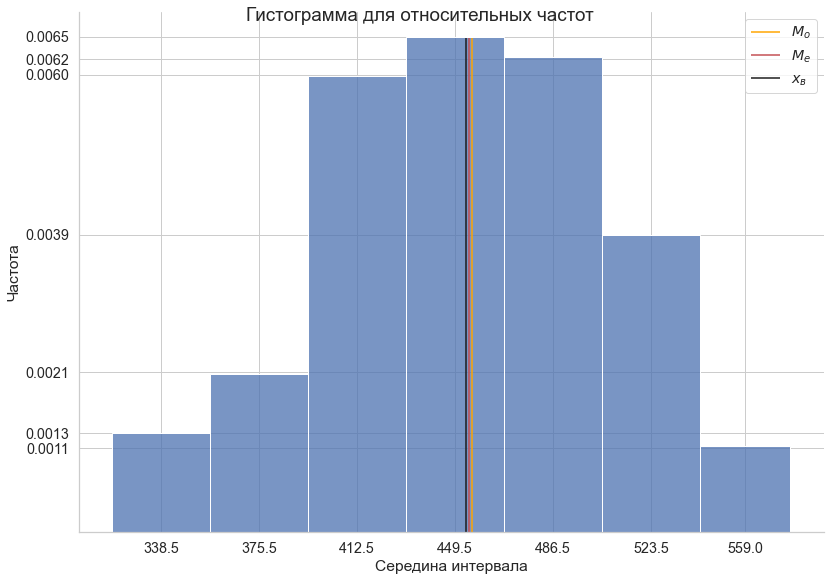

In [15]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.displot(data=original, x='nu', bins=np.array([320, 357, 394, 431, 468, 505, 542, 576]),
                 kind='hist', height=8.27, aspect=11.7/8.27, stat='density')
plt.vlines(raw_mode, 0, int_row.loc[3, 'rf']/h, colors='orange', linestyles='solid', label='$M_o$')
plt.vlines(raw_median, 0, int_row.loc[3, 'rf']/h, colors='r', linestyles='solid', label='$M_e$')
plt.vlines(int_mean, 0, int_row.loc[3, 'rf']/h, colors='k', linestyles='solid', label='$x_в$')
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(xticks=int_row['avg_inter'], yticks=round((int_row['rf']/h), 4))
ax.fig.suptitle('Гистограмма для относительных частот')
plt.legend()
plt.savefig('pics/1.png')

## Переменная $E$

In [16]:
original = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/lab1/data2/data2.csv')
var_row = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/lab1/data2/data4.csv')
var_row.to_csv('data/var_row2.csv', index=False)
n = 104
h = 16.1

In [17]:
int_row = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/data/interval2.csv')
int_row['cum_sum'] = np.round(np.cumsum(int_row['rf']), 3)
int_row['rf'] = np.round(int_row['rf'], 3)
int_row['avg_inter'] = np.round(int_row['avg_inter'], 2)
int_row.to_csv('data/int_row2.csv', index=False)
int_row

,inter,avg_inter,af,rf,cum_sum
0,"[64.5, 80.6)",72.55,2,0.019,0.019
1,"[80.6, 96.7)",88.65,5,0.048,0.067
2,"[96.7, 112.8)",104.75,15,0.144,0.211
3,"[112.8, 128.9)",120.85,27,0.260,0.471
4,"[128.9, 145.0)",136.95,27,0.260,0.731
5,"[145.0, 161.1)",153.05,21,0.202,0.933
6,"[161.1, 177.0)",169.05,7,0.067,1.000


In [18]:
usl_mom = int_row.copy()
usl_mom = usl_mom.iloc[:, [1,3]]
usl_mom['u'] = np.arange(-3,4,1)
usl_mom['nu'] = usl_mom['rf']*usl_mom['u']
usl_mom['nu2'] = usl_mom['rf']*pow(usl_mom['u'], 2)
usl_mom['nu3'] = usl_mom['rf']*pow(usl_mom['u'], 3)
usl_mom['nu4'] = usl_mom['rf']*pow(usl_mom['u'], 4)
usl_mom['nu4+'] = usl_mom['rf']*pow(usl_mom['u']+1, 4)
usl_mom

,avg_inter,rf,u,nu,nu2,nu3,nu4,nu4+
0,72.55,0.019,-3,-0.057,0.171,-0.513,1.539,0.304
1,88.65,0.048,-2,-0.096,0.192,-0.384,0.768,0.048
2,104.75,0.144,-1,-0.144,0.144,-0.144,0.144,0.000
3,120.85,0.260,0,0.000,0.000,0.000,0.000,0.260
4,136.95,0.260,1,0.260,0.260,0.260,0.260,4.160
5,153.05,0.202,2,0.404,0.808,1.616,3.232,16.362
6,169.05,0.067,3,0.201,0.603,1.809,5.427,17.152


In [19]:
usl_mom_f = usl_mom.append(usl_mom.sum(), ignore_index=True)
usl_mom_f.to_csv('data/usl_mom2.csv', index=False)
usl_mom_f

,avg_inter,rf,u,nu,nu2,nu3,nu4,nu4+
0,72.55,0.019,-3.0,-0.057,0.171,-0.513,1.539,0.304
1,88.65,0.048,-2.0,-0.096,0.192,-0.384,0.768,0.048
2,104.75,0.144,-1.0,-0.144,0.144,-0.144,0.144,0.000
3,120.85,0.260,0.0,0.000,0.000,0.000,0.000,0.260
4,136.95,0.260,1.0,0.260,0.260,0.260,0.260,4.160
5,153.05,0.202,2.0,0.404,0.808,1.616,3.232,16.362
6,169.05,0.067,3.0,0.201,0.603,1.809,5.427,17.152
7,845.85,1.000,0.0,0.568,2.178,2.644,11.370,38.286


In [20]:
moms = usl_mom_f.iloc[7, [3,4,5,6]]
checker = moms[3]+4*moms[2]+6*moms[1]+4*moms[0]+1
'True' if checker == usl_mom_f.loc[7, ['nu4+']][0] else 'False'
checker

'True'

38.286

In [21]:
M1 = moms[0]*h+120.85
m2 = (moms[1] - pow(moms[0],2))*pow(h,2)
m3 = (moms[2] - 3*moms[1]*moms[0] + 2*pow(moms[0],3))*pow(h,3)
m4 = (moms[3] - 4*moms[2]*moms[0] + 6*moms[1]*pow(moms[0],2) - 3*pow(moms[0],4))*pow(h,4)
M1, m2, m3, m4

(129.9948, 480.93201296000007, -2924.6817984572176, 622622.8161265319)

In [22]:
int_mean = (int_row['avg_inter']*int_row['af']).sum()/n
int_var = (((int_row['avg_inter']-int_mean)**2)*int_row['af']).sum()/n
s = int_var*(n/(n-1))
std_s = np.sqrt(s)
std_var = np.sqrt(int_var)
int_mean
int_var
s
std_s
std_var

129.97692307692307

481.825428994083

486.5033457804333

22.056820844818805

21.95052229433466

In [23]:
As = m3/(pow(s, 3))
Ex = (m4/(pow(s, 4))) - 3
As, Ex

(-2.53992637736103e-05, -2.9999888857104704)

In [24]:
original.mean()

E    129.931731
dtype: float64